In [1]:
import pandas as pd 
dataset=pd.read_csv("indianEco.csv")
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset.set_index('Year', inplace=True)
dataset

,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,,,,
1960-01-01,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1961-01-01,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
1962-01-01,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
1963-01-01,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
1964-01-01,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,India,2.294798e+12,1733,8.26,20.92,19.16,3.616943e+11,4.95,1338636340,1.19,68.67
2017-01-01,India,2.651473e+12,1981,6.80,21.95,18.79,4.126138e+11,3.33,1354195680,1.16,68.97
2018-01-01,India,2.702930e+12,1997,6.53,23.69,19.93,3.991672e+11,3.94,1369003306,1.09,69.27


In [2]:
column = "Inflation, consumer prices (annual %)"
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1 = Ms.fit_transform(dataset[[column]])
print("Len:" , data1.shape)

Len: (61, 1)


In [3]:
training_size = round(len(data1) * 0.80)
print(training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

49
X_train length: (49, 1)
X_test length: (12, 1)
y_train length: (49, 1)
y_test length: (12, 1)


In [4]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RMSE-Testset: 0.11816088283243562
maPe-Testset: 16684642217731.576
RMSE-Testset: 0.12121164403043715
maPe-Testset: 18924911252782.633
RMSE-Testset: 0.12089937453024409
maPe-Testset: 16908320209367.658
RMSE-Testset: 0.12121164403043715
maPe-Testset: 18924911252782.633


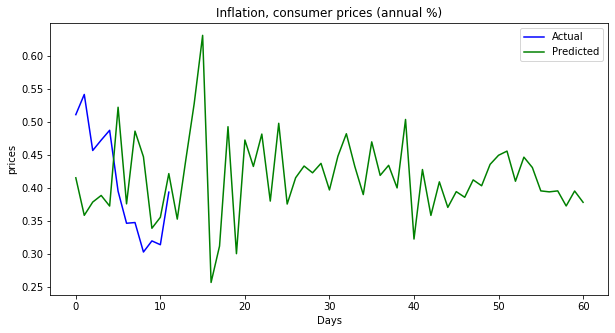

In [5]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [6]:
y_test

array([[0.51090257],
       [0.54154016],
       [0.45652774],
       [0.47226056],
       [0.48716533],
       [0.39470052],
       [0.346122  ],
       [0.34722606],
       [0.30251173],
       [0.31934861],
       [0.3135523 ],
       [0.39332045]])

In [7]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [8]:
aTestNormTable

,"Inflation, consumer prices (annual %)"
0,0.510903
1,0.54154
2,0.456528
3,0.472261
4,0.487165
5,0.394701
6,0.346122
7,0.347226
8,0.302512
9,0.319349


In [9]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [10]:
actual_stock_price_test_ori

array([[10.88],
       [11.99],
       [ 8.91],
       [ 9.48],
       [10.02],
       [ 6.67],
       [ 4.91],
       [ 4.95],
       [ 3.33],
       [ 3.94],
       [ 3.73],
       [ 6.62]])

In [11]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [12]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

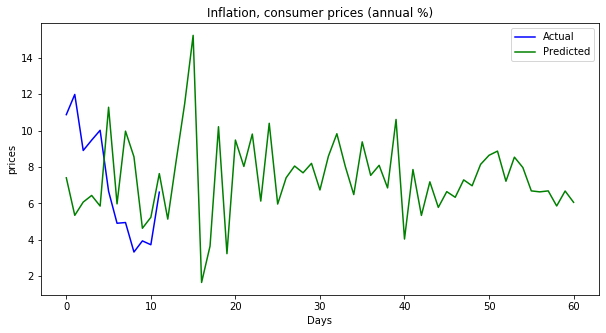

In [13]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [17]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [18]:
forecast

array([0.42784529, 0.41328309, 0.41532042, 0.41503539])

In [19]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Inflation, consumer prices (annual %)"])

In [20]:
forecast_stock_price_test_oriF

,"Inflation, consumer prices (annual %)"
0,7.870835
1,7.343246
2,7.417059
3,7.406732
